## SVM algorithm 
### Dataset 2

In [21]:
import nbimporter
from Helper import * 
%matplotlib inline
random_seed = 42

In [22]:
X_train, X_test, y_train, y_test = import_dataset2()

number of training samples:  2520
number of test samples:  630


In [29]:
pipe_steps = [('scaler', StandardScaler()), 
              ('svm', SVC(shrinking=True, 
                          probability=False, cache_size=200, verbose=False,
                          break_ties=False, random_state=random_seed))]

params = {'svm__kernel':['linear', 'rbf', 'sigmoid'],
         'svm__C': [0.5,1,1.5], 
         'svm__class_weight': [None, 'balanced']}

pipeline = Pipeline(pipe_steps)

In [65]:
%%time

classifier_cv = RandomizedSearchCV(pipeline, params, cv=StratifiedKFold(5), scoring='roc_auc', n_jobs=-1)
classifier_cv.fit(X_train, y_train)

print('\nBest Score : %.2f'%classifier_cv.best_score_, ' Best Params : ', str(classifier_cv.best_params_))


Best Score : 0.97  Best Params :  {'svm__kernel': 'rbf', 'svm__class_weight': 'balanced', 'svm__C': 1.5}
CPU times: user 235 ms, sys: 238 ms, total: 473 ms
Wall time: 19.7 s


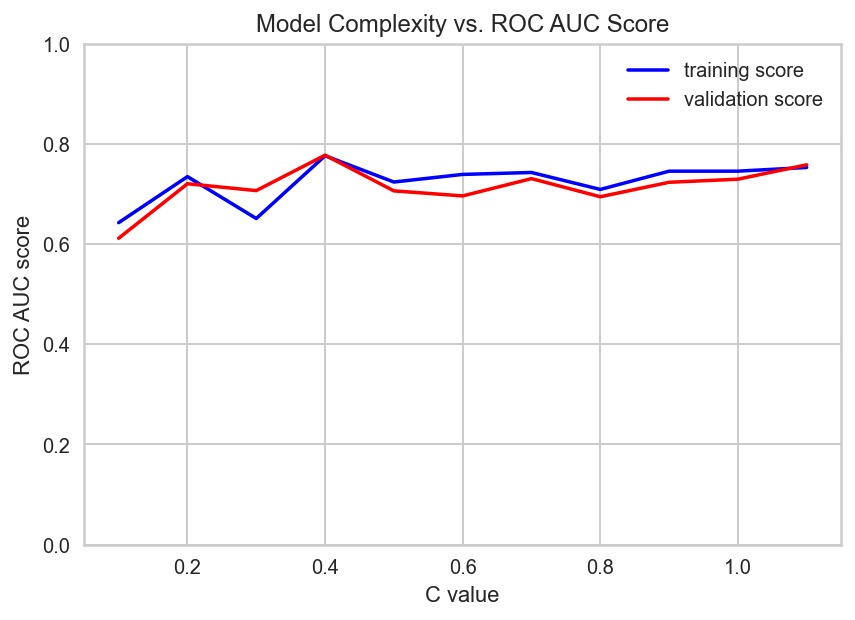

In [35]:
c_range = [round(i,2) for i in list(np.arange(0.1, 1.2, 0.1000))]

train_score, val_score = validation_curve(SVC(kernel ='rbf'), X_train, y_train, 
                                          scoring = 'roc_auc',
                                          param_name = 'C', 
                                          param_range = c_range,
                                          cv=StratifiedKFold(5))

plt.plot(c_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(c_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Model Complexity vs. ROC AUC Score')
plt.ylim(0, 1)
plt.xlabel('C value')
plt.ylabel('ROC AUC score');

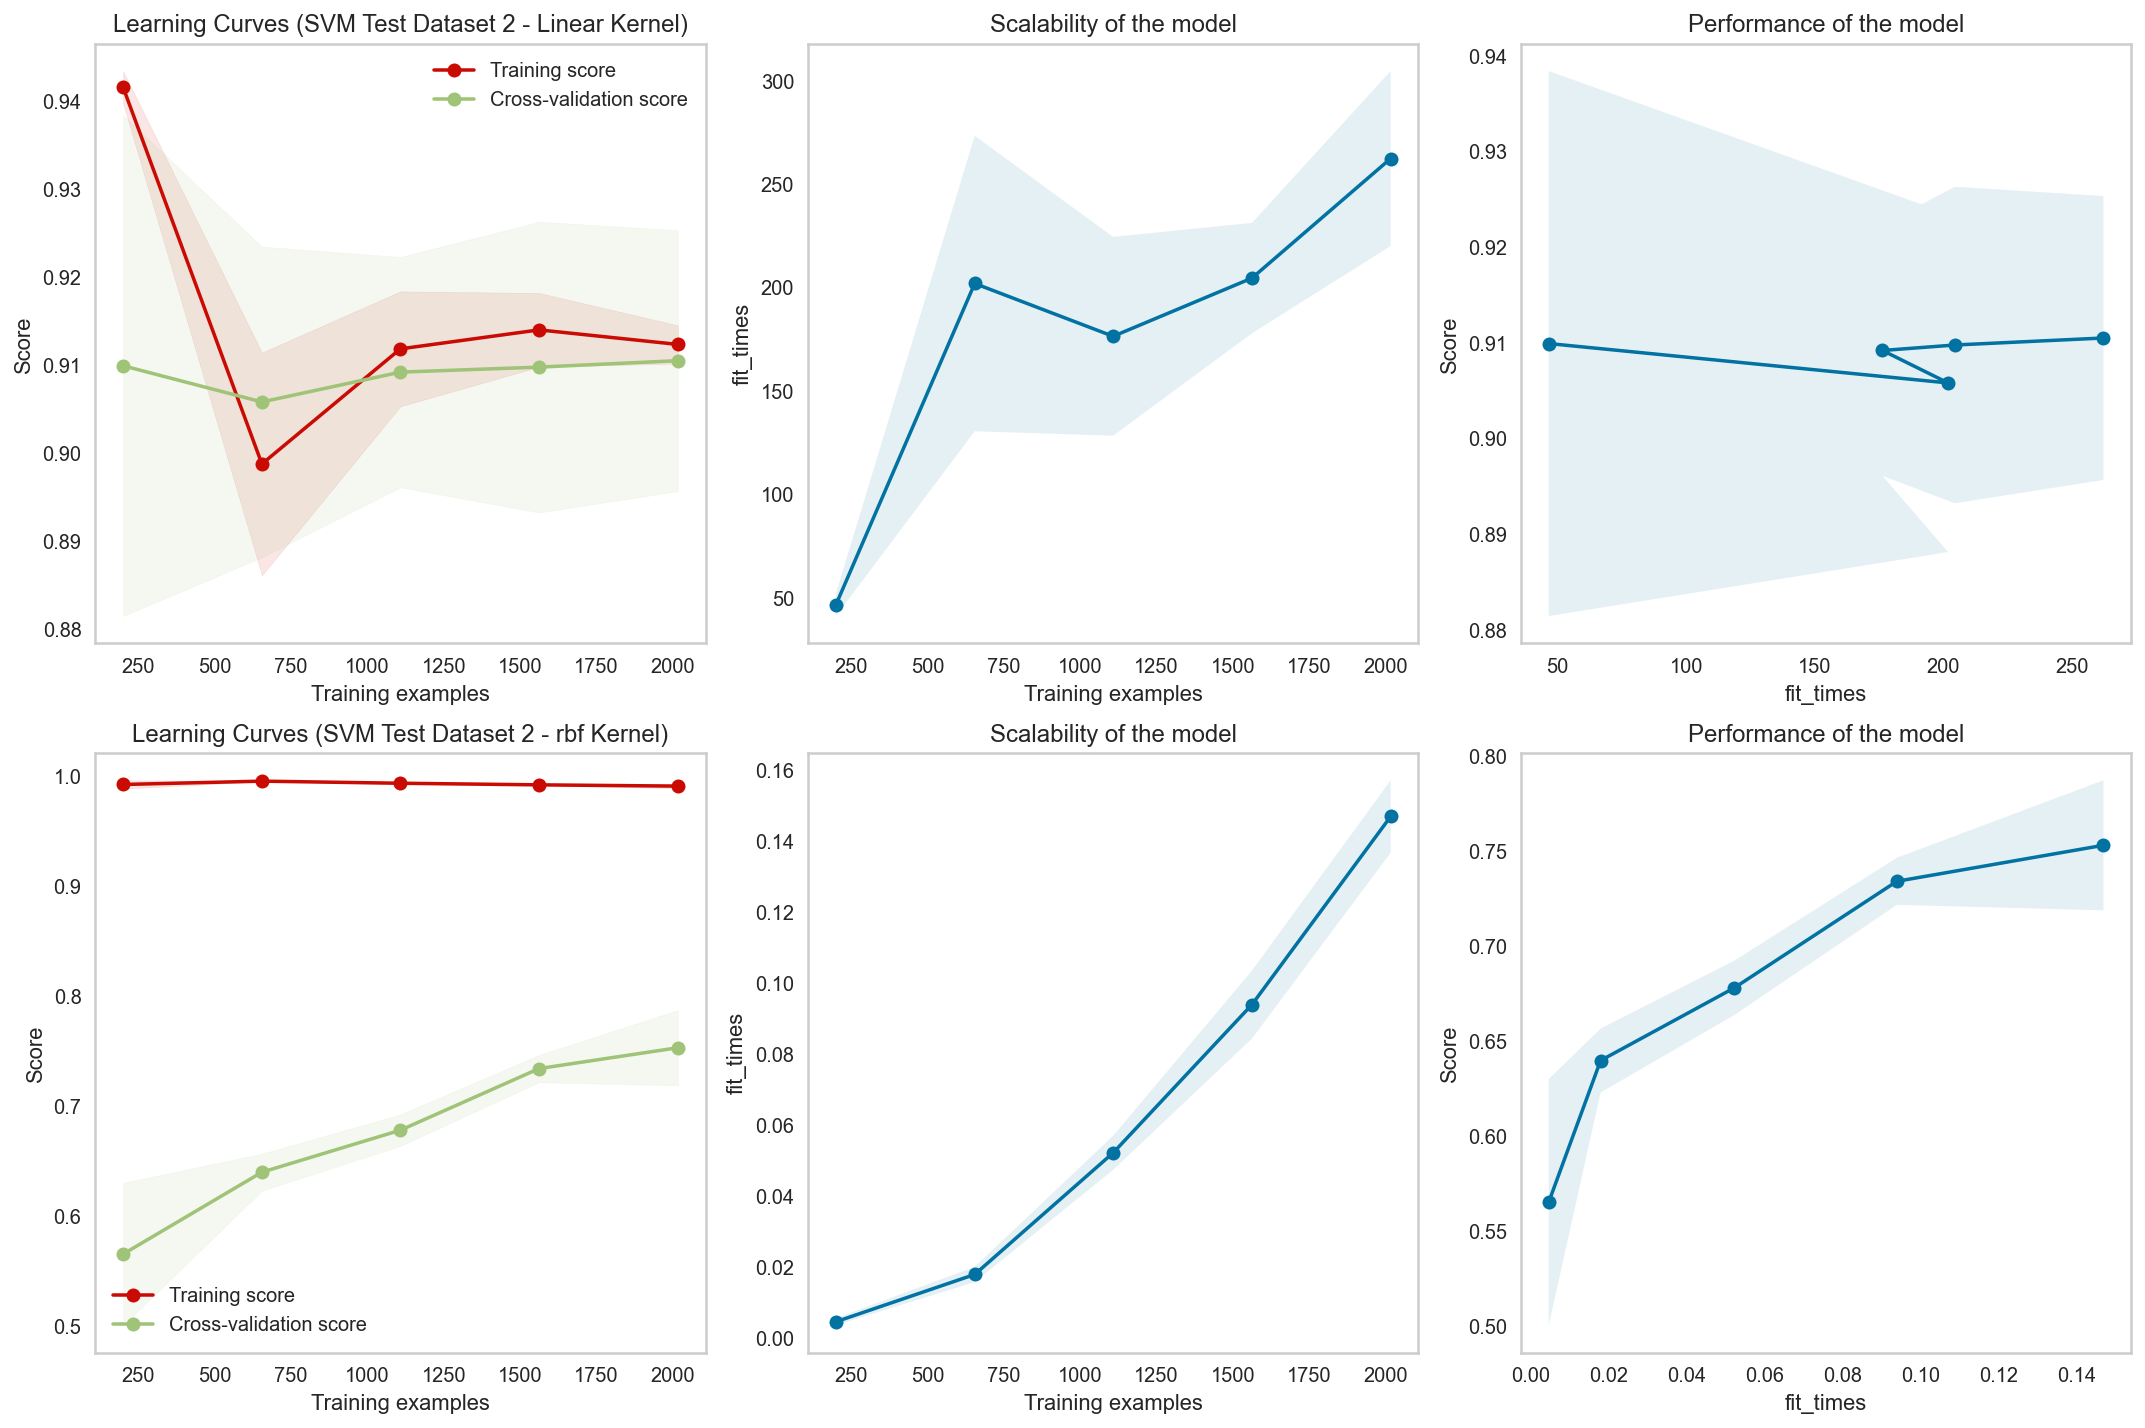

In [68]:
fig, axes = plt.subplots(2,3, figsize=(15, 10))

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = StratifiedKFold(5)

estimator = SVC(random_state=0, kernel='linear', gamma='auto', class_weight=None)
estimator1 = SVC(random_state=0, kernel='rbf', gamma='auto', class_weight=None)


title = "Learning Curves (SVM Test Dataset 2 - Linear Kernel)"
plot_learning_curve(estimator, title, X_train, y_train,cv=cv, n_jobs=-1, axes=axes[0, :])
plt.tight_layout()


title = "Learning Curves (SVM Test Dataset 2 - rbf Kernel)"
plot_learning_curve(estimator1, title, X_train, y_train,cv=cv, n_jobs=-1, axes=axes[1, :])
plt.tight_layout()

plt.show()

In [ ]:
classifier = SVC(kernel='linear', C=1.5, gamma='auto', class_weight='balanced')

In [70]:
%%time
classifier.fit(X_train, y_train)

CPU times: user 3min 2s, sys: 162 ms, total: 3min 2s
Wall time: 3min 2s


SVC(C=1.5, class_weight='balanced', gamma='auto', kernel='linear')

In [71]:
%%time
y_pred = classifier.predict(X_test)

CPU times: user 5.59 ms, sys: 3.81 ms, total: 9.4 ms
Wall time: 10 ms


CPU times: user 3min 15s, sys: 322 ms, total: 3min 16s
Wall time: 3min 16s


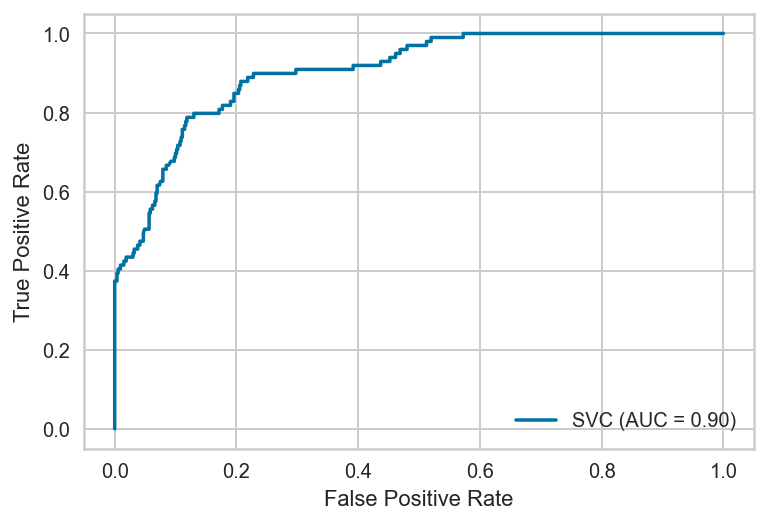

In [67]:
%%time
plot_roc_curve(classifier, X_test, y_test);

In [69]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
display(df_report)

,precision,recall,f1-score,support
0,0.957717,0.853107,0.902390,531.000000
1,0.503185,0.797980,0.617187,99.000000
accuracy,0.844444,0.844444,0.844444,0.844444
macro avg,0.730451,0.825544,0.759789,630.000000
weighted avg,0.886290,0.844444,0.857573,630.000000
